In [6]:
from keras.layers import Input, Dense
from keras.models import Model, load_model

class SimpleAutoencoder:
    def __init__(self):
        self.encoder_model = None
        self.model = None
        return
    
    def build(self, input_dim, encoding_dim):
        input_layer = Input(shape=(input_dim,))
        encoder_output = Dense(encoding_dim, activation='relu') (input_layer)
        self.encoder_model = Model(input_layer, encoder_output)
        decoder_output = Dense(input_dim, activation='sigmoid') (encoder_output)
        self.model = Model(input_layer, decoder_output)
        self.model.compile(optimizer='adadelta', loss='binary_crossentropy')
        return
    
    def load(self, model_file, encoder_model_file):
        self.encoder_model = load_model(encoder_model_file)
        self.model = load_model(model_file)
        return
    
    def train(self, train_input, train_output,
             val_input, val_output,
             epochs=50,
             batch_size=256,
             shuffle=True):
        self.model.fit(train_input, train_output,
                      epochs=epochs, batch_size=batch_size,
                      shuffle=shuffle,
                      validation_data=(val_input, val_output))
        return
    
    def encoder_predict(self, test_input):
        return self.encoder_model.predict(test_input)
    
    def predict(self, test_input):
        return self.model.predict(test_input)
    
    def save(self, model_file, encoder_model_file):
        self.model.save(model_file)
        self.encoder_model.save(encoder_model_file)
        return

In [11]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [13]:
autoencoder = SimpleAutoencoder()
autoencoder.build(784, 32)

In [14]:
autoencoder.train(x_train, x_train, x_test, x_test,
                 epochs=50,
                 batch_size=256,
                 shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 96s - loss: 0.3879 - val_loss: 0.2725
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2645 - val_loss: 0.2533
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2443 - val_loss: 0.2327
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2253 - val_loss: 0.2152
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2101 - val_loss: 0.2025
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1992 - val_loss: 0.1933
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1909 - val_loss: 0.1858
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1840 - val_loss: 0.1795
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1781 - val_loss: 0.1741
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1729 - val_loss: 0.169

In [15]:
pred_train = autoencoder.predict(x_test)

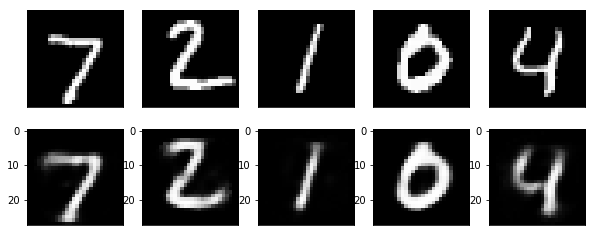

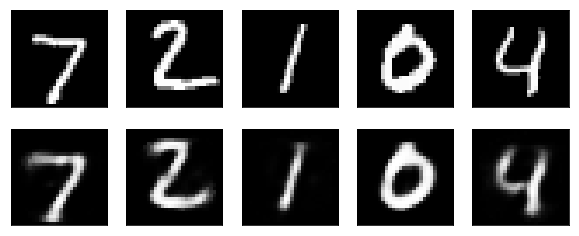

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(pred_train[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()